In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
beatles = pd.read_csv("TheBeatlesCleaned.csv")

In [3]:
#Liveness - How live-sounding versus how studio-produced songs sound.Higher values are more live sounding.  
#Danceability - The higher the value, the easier it is to dance to this song.
#Valence - The higher the value, the more positive the sound is.
#Energy - How energetic the song sounds
#Liveness - How live-sounding the song is versus how studio-produced it sounds. Closer to 1 is more live.
#Duration -  Duration of the song in miliseconds.
#Acoustic - The higher the value, the more acoustic the song is.
#Popularity - The higher the value the more popular the song is.

In [4]:
#Selecting required columns
beatles_columns = beatles[["year", "duration_ms", "song", "album", "danceability", "valence", "energy", "liveness"]]

In [5]:
#Sorting columns into ascending order to see longest songs
beatles_columns = beatles_columns.sort_values(["duration_ms"], ascending=[True])

In [6]:
beatles_columns

,year,duration_ms,song,album,danceability,valence,energy,liveness
180,1969,25987,her majesty,Abbey Road,0.703,0.522,0.215,0.1300
187,1970,40040,maggie mae,Let It Be,0.516,0.524,0.515,0.1030
185,1970,50467,dig it,Let It Be,0.540,0.670,0.489,0.4570
125,1968,52973,wild honey pie,The Beatles (white album),0.792,0.152,0.763,0.7890
174,1969,66533,mean mr mustard,Abbey Road,0.676,0.970,0.596,0.3510
...,...,...,...,...,...,...,...,...
104,1967,304667,within you without you,Sgt. Pepper's Lonely Hearts Club Band,0.352,0.354,0.479,0.4860
109,1967,337413,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,0.364,0.175,0.457,0.9220
155,1969,385013,its all too much,Yellow Submarine,0.390,0.199,0.781,0.1000
169,1969,467320,I want you(she's so heavy),Abbey Road,0.370,0.420,0.515,0.0966


In [7]:
#Finding out the min, max and mean of Beatles songs
beatles_describe = beatles_columns.describe()
beatles_describe

,year,duration_ms,danceability,valence,liveness
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,1966.290155,163644.155440,0.519093,0.642191,0.228647
std,2.256647,57982.884527,0.138738,0.250929,0.200419
min,1963.000000,25987.000000,0.146000,0.035700,0.041400
25%,1964.000000,133507.000000,0.419000,0.473000,0.099400
50%,1966.000000,154200.000000,0.533000,0.690000,0.139000
75%,1968.000000,180213.000000,0.612000,0.835000,0.298000
max,1970.000000,502013.000000,0.880000,0.975000,0.922000


In [8]:
#Checking the types in the Beatles Dataframe - this is why energy is not a float and so it is not appearing on the "describe" dataframe 
beatles.dtypes

id                int64
year              int64
album            object
song             object
danceability    float64
energy           object
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
duration_ms       int64
dtype: object

In [9]:
# - On the CSV file there is a misplaced bracket symbol before the float  ).613 . This is in the energy cell for the song magical mystery tour but appears fine on DataFrame
beatles_columns.loc[[110]]

,year,duration_ms,song,album,danceability,valence,energy,liveness
110,1967,170107,magical mystery tour,Magical Mystery Tour,0.297,0.338,).613,0.0734


In [10]:
#replaced the errror misplaced bracket symbol & repaired the float
beatles_columns.at[110, "energy"] = 0.613;
beatles_columns.loc[[110]]

,year,duration_ms,song,album,danceability,valence,energy,liveness
110,1967,170107,magical mystery tour,Magical Mystery Tour,0.297,0.338,0.613,0.0734


In [59]:
#Problem now fixed? We can look for the mean value of the energy column
beatles_columns["energy"].mean()

TypeError: can only concatenate str (not "float") to str

In [55]:
#Longest Beatles Songs DataFrame, indexed by year. 

In [56]:
beatles_df_sorted = beatles_columns.sort_values(["duration_ms"], ascending=[False]);

In [57]:
beatles_index = beatles_df_sorted.set_index("year")

In [58]:
beatles_index.head(10)

,duration_ms,song,album,danceability,valence,energy,liveness
year,,,,,,,
1968,502013,revolution 9,The Beatles (white album),0.208,0.101,0.615,0.8240
1969,467320,I want you(she's so heavy),Abbey Road,0.370,0.420,0.515,0.0966
1969,385013,its all too much,Yellow Submarine,0.390,0.199,0.781,0.1000
1967,337413,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,0.364,0.175,0.457,0.9220
1967,304667,within you without you,Sgt. Pepper's Lonely Hearts Club Band,0.352,0.354,0.479,0.4860
1968,285000,while my guitar gently weeps,The Beatles (white album),0.453,0.702,0.654,0.1720
1967,275867,I am the walrus,Magical Mystery Tour,0.401,0.654,0.556,0.5890
1968,269787,helter skelter,The Beatles (white album),0.166,0.281,0.831,0.8110
1969,259947,come together,Abbey Road,0.533,0.187,0.376,0.0926


In [14]:
#Shortest Beatles Songs DataFrame, indexed by year

In [15]:
beatles_df_sorted_ascending = beatles_columns.sort_values(["duration_ms"], ascending=[True])

In [16]:
beatles_index_ascending = beatles_df_sorted_ascending.set_index("year")

In [17]:
beatles_index_ascending.head(10)

,duration_ms,song,album,danceability,valence,energy,liveness
year,,,,,,,
1969,25987,her majesty,Abbey Road,0.703,0.522,0.215,0.1300
1970,40040,maggie mae,Let It Be,0.516,0.524,0.515,0.1030
1970,50467,dig it,Let It Be,0.540,0.670,0.489,0.4570
1968,52973,wild honey pie,The Beatles (white album),0.792,0.152,0.763,0.7890
1969,66533,mean mr mustard,Abbey Road,0.676,0.970,0.596,0.3510
1969,72640,polythene pam,Abbey Road,0.474,0.499,0.939,0.1900
1967,79067,sgt. Peppers lonely hearts club band,Sgt. Pepper's Lonely Hearts Club Band,0.653,0.879,0.889,0.8920
1969,91760,golden slumbers,Abbey Road,0.419,0.239,0.152,0.1130
1969,96467,carry that weight,Abbey Road,0.543,0.704,0.458,0.2980


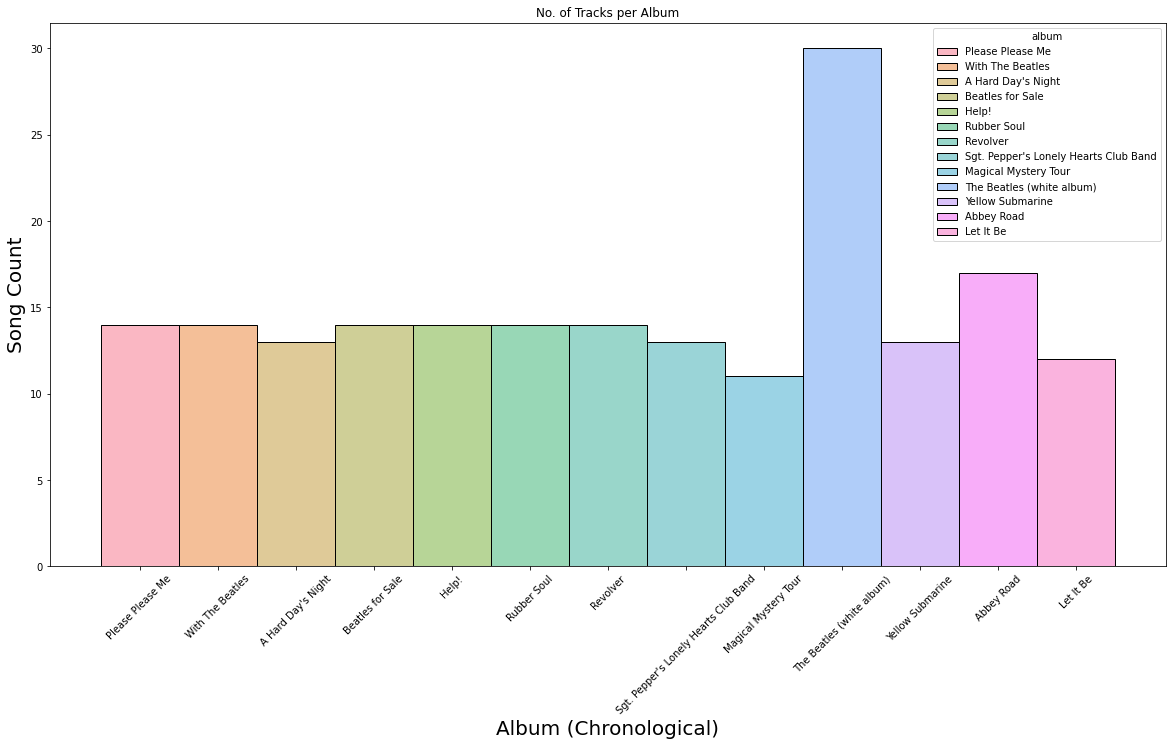

In [18]:
#Histogram of track count on Beatles albums using Matplotlib
plt.figure(figsize = (20,10))
p1 = sns.histplot(data=beatles, x='album', hue='album', legend=True)
p1.set(title='No. of Tracks per Album')
p1.set_ylabel("Song Count", fontsize=20)
p1.set_xlabel("Album (Chronological)", fontsize=20)
plt.xticks(rotation=45);

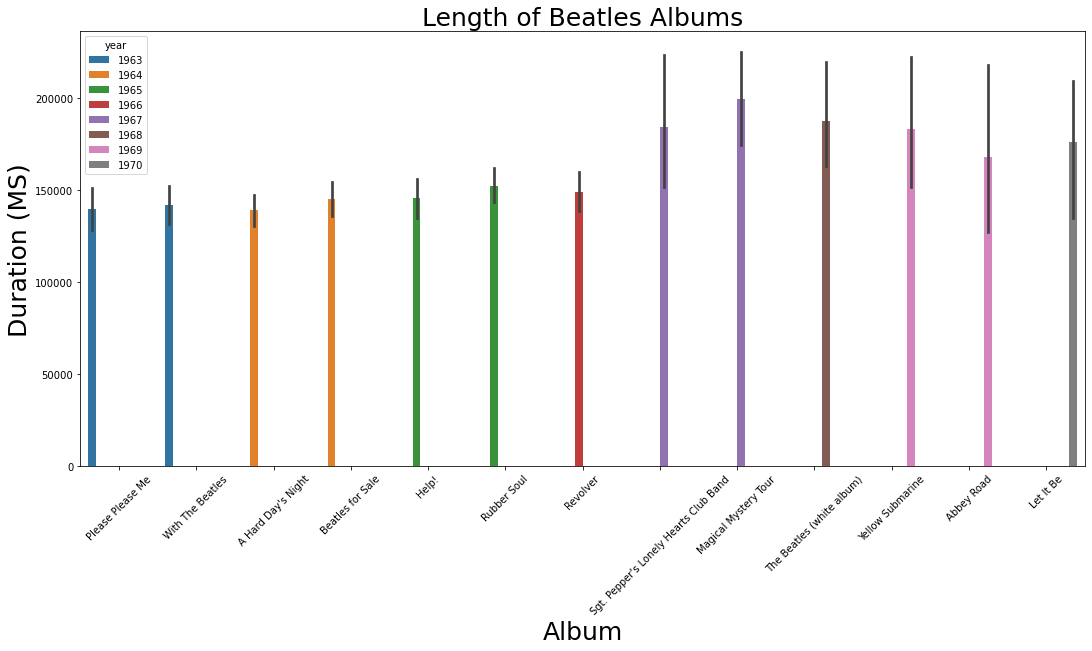

In [19]:
#Barplot of relationship between album & duration using Seaborn
sns.barplot(data=beatles, x="album", y="duration_ms", hue="year")
plt.gcf().set_size_inches(18, 8)
plt.ylabel("Duration (MS)", fontsize=25)
plt.xlabel("Album", fontsize=25)
plt.xticks(rotation=45)
plt.title("Length of Beatles Albums", fontsize=25);

Text(0, 0.5, 'No. of Songs')

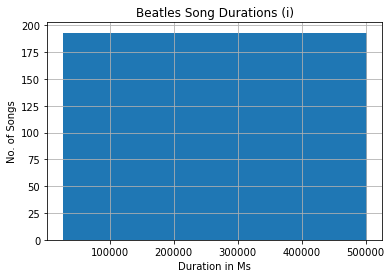

In [61]:
#Visualisation of Beatles Song Lengths over Time. Hist charts showing quantity of songs by duration. 
beatles_index["duration_ms"].hist(bins=1)
plt.title("Beatles Song Durations (i)")
plt.xlabel("Duration in Ms")
plt.ylabel("No. of Songs")

Text(0, 0.5, 'No. of Songs')

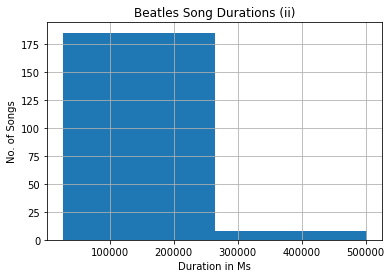

In [62]:
beatles_index["duration_ms"].hist(bins=2)
plt.title("Beatles Song Durations (ii)")
plt.xlabel("Duration in Ms")
plt.ylabel("No. of Songs")

Text(0, 0.5, 'No. of Songs')

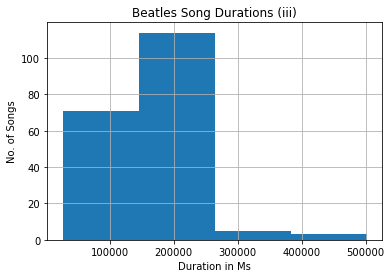

In [63]:
beatles_index["duration_ms"].hist(bins=4)
plt.title("Beatles Song Durations (iii)")
plt.xlabel("Duration in Ms")
plt.ylabel("No. of Songs")

Text(0, 0.5, 'No. of Songs')

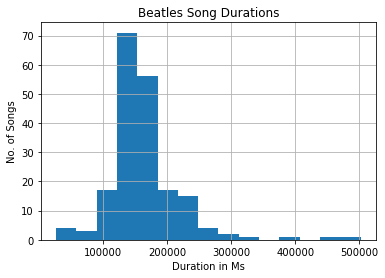

In [64]:
beatles_index["duration_ms"].hist(bins=15)
plt.title("Beatles Song Durations")
plt.xlabel("Duration in Ms")
plt.ylabel("No. of Songs")

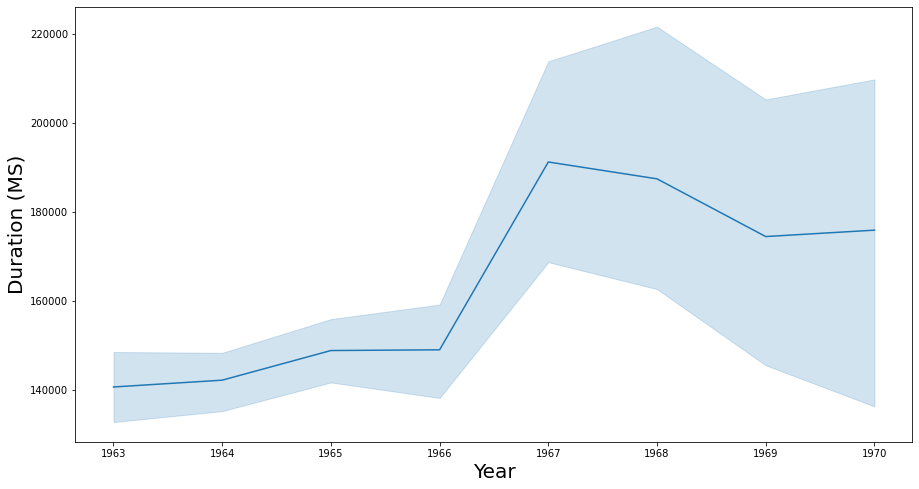

In [24]:
#Line plot of changes in Beatles song durations over time

sns.lineplot(data=beatles_index_ascending["duration_ms"])
plt.gcf().set_size_inches(15, 8)
plt.ylabel("Duration (MS)", fontsize=20)
plt.xlabel("Year", fontsize=20);

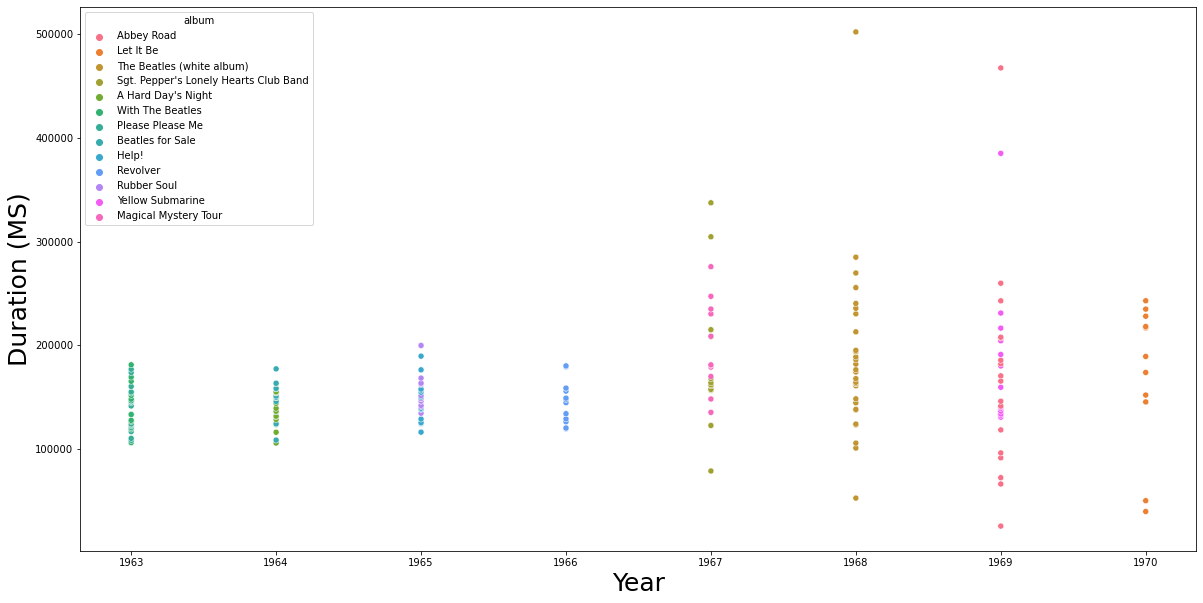

In [25]:
#Scatterplot showing Beatles song durations throughout the years the band were active

sns.scatterplot(data=beatles_index_ascending, x="year", y="duration_ms", hue="album")
plt.gcf().set_size_inches(20, 10)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Duration (MS)", fontsize=25);

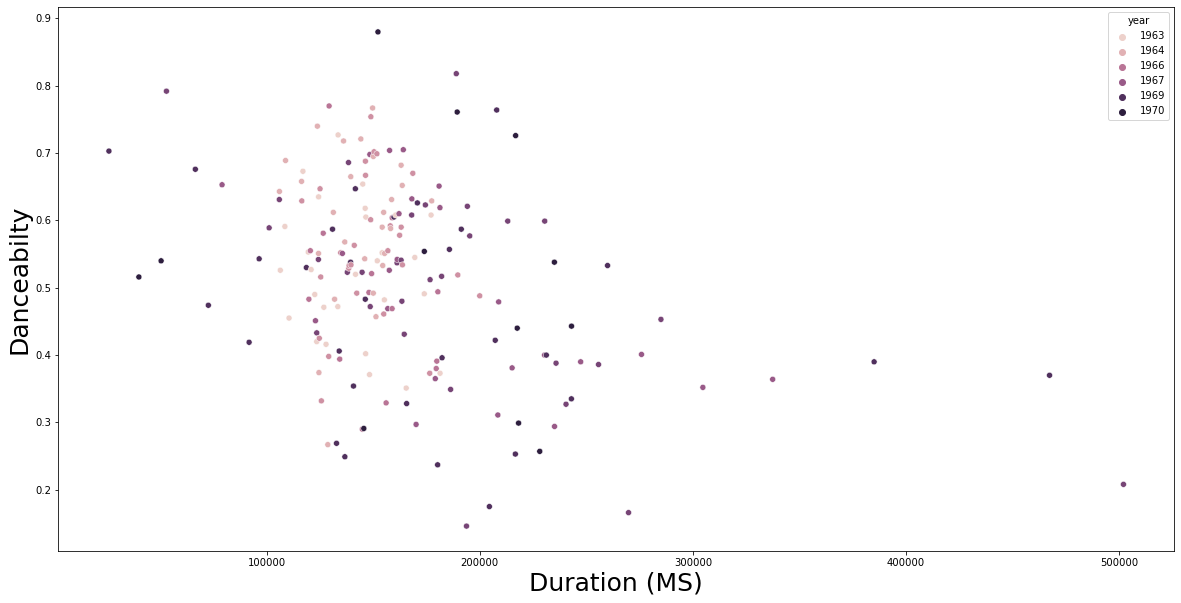

In [26]:
#Scatterplot showing relationship between danceability & song duration

sns.scatterplot(data=beatles_index_ascending, y="danceability", x="duration_ms", hue= "year")
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Danceabilty", fontsize=25)
plt.xlabel("Duration (MS)", fontsize=25);

In [27]:
#Beginning to look at in more features such as valence, liveness and acousticness

beatles_columns2 = beatles[["year", "duration_ms","song", "album", "danceability", "valence", "energy", "liveness", "acousticness"]]

In [28]:
beatles_columns2

,year,duration_ms,song,album,danceability,valence,energy,liveness,acousticness
0,1963,173947,I Saw Her Standing There,Please Please Me,0.491,0.971,0.801,0.0665,0.2700
1,1963,108547,Misery,Please Please Me,0.591,0.882,0.605,0.3090,0.7070
2,1963,177133,Anna,Please Please Me,0.608,0.835,0.565,0.0601,0.6350
3,1963,145080,Chains,Please Please Me,0.654,0.929,0.561,0.1290,0.6080
4,1963,146440,Boys,Please Please Me,0.402,0.822,0.86,0.7360,0.6070
...,...,...,...,...,...,...,...,...,...
188,1970,217560,ive got a feeling,Let It Be,0.440,0.364,0.609,0.5820,0.0715
189,1970,173960,one after 909,Let It Be,0.554,0.888,0.828,0.9070,0.0307
190,1970,218187,the long and winding road,Let It Be,0.299,0.392,0.329,0.0559,0.7560
191,1970,152213,for you blue,Let It Be,0.880,0.955,0.556,0.2400,0.2400


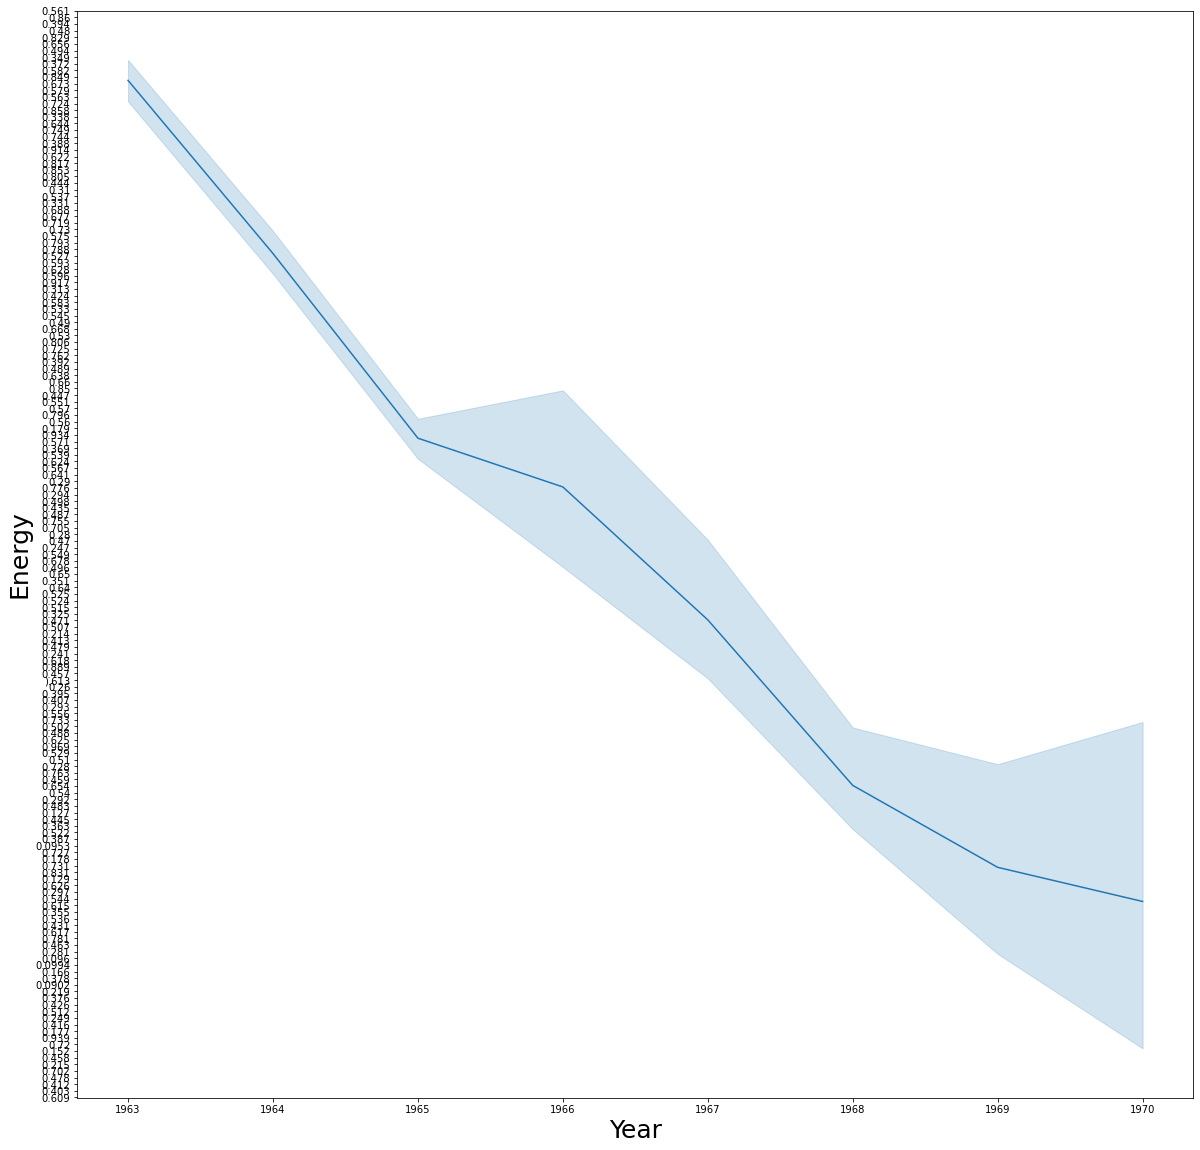

In [29]:
#Energy of Beatles songs throughout the years
sns.lineplot(data=beatles_columns2, x="year", y="energy")
plt.gcf().set_size_inches(20, 20)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Energy", fontsize=25);

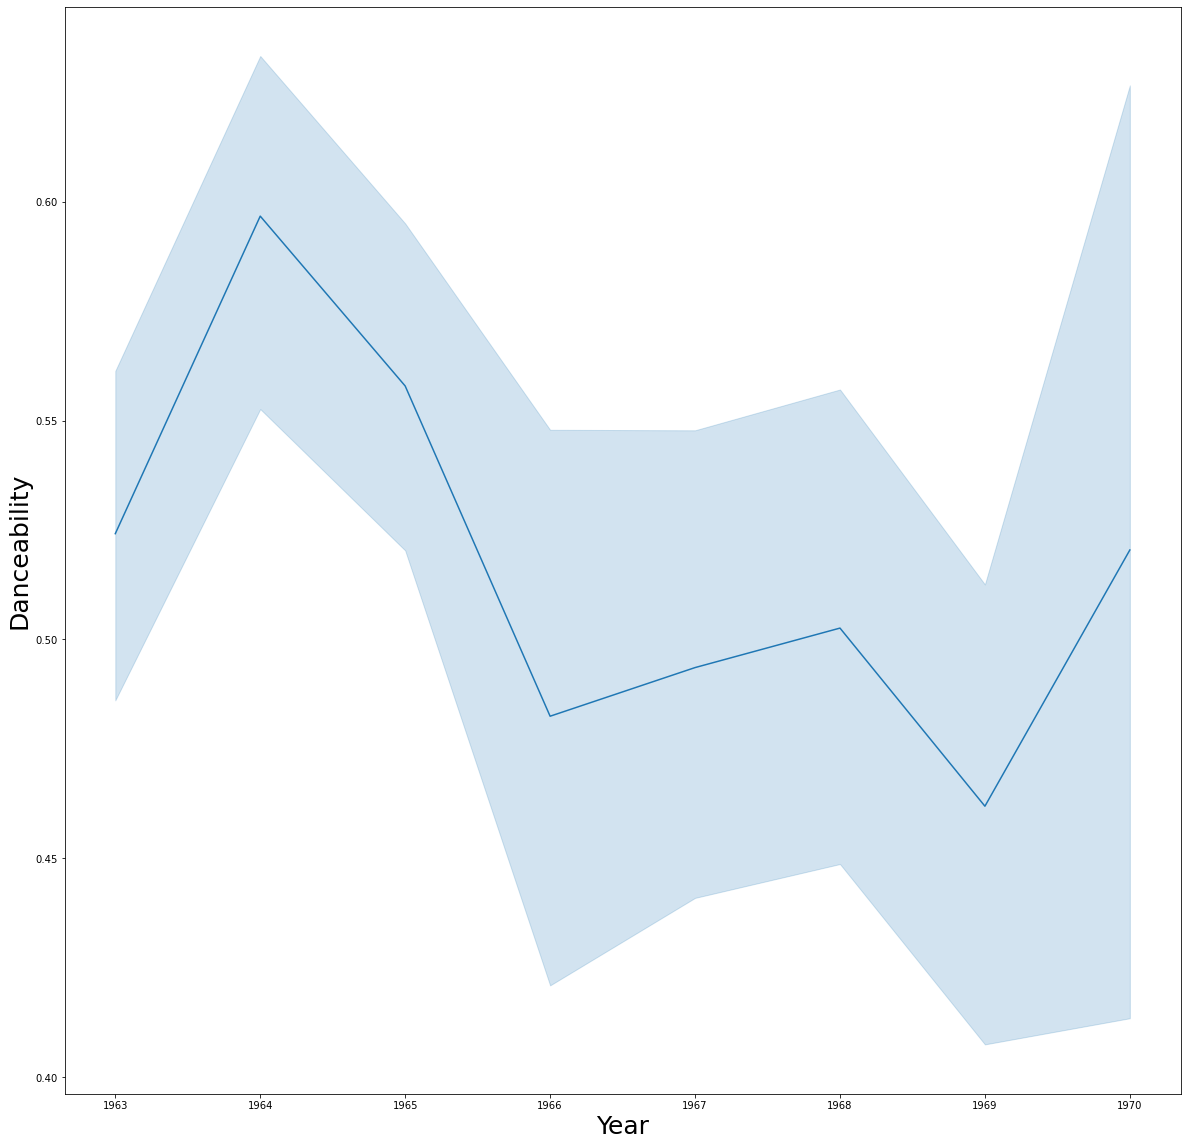

In [30]:
#Lineplot showing danceability of Beatles songs over time

sns.lineplot(data=beatles_columns2, y="danceability", x="year")
plt.gcf().set_size_inches(20, 20)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Danceability", fontsize=25);

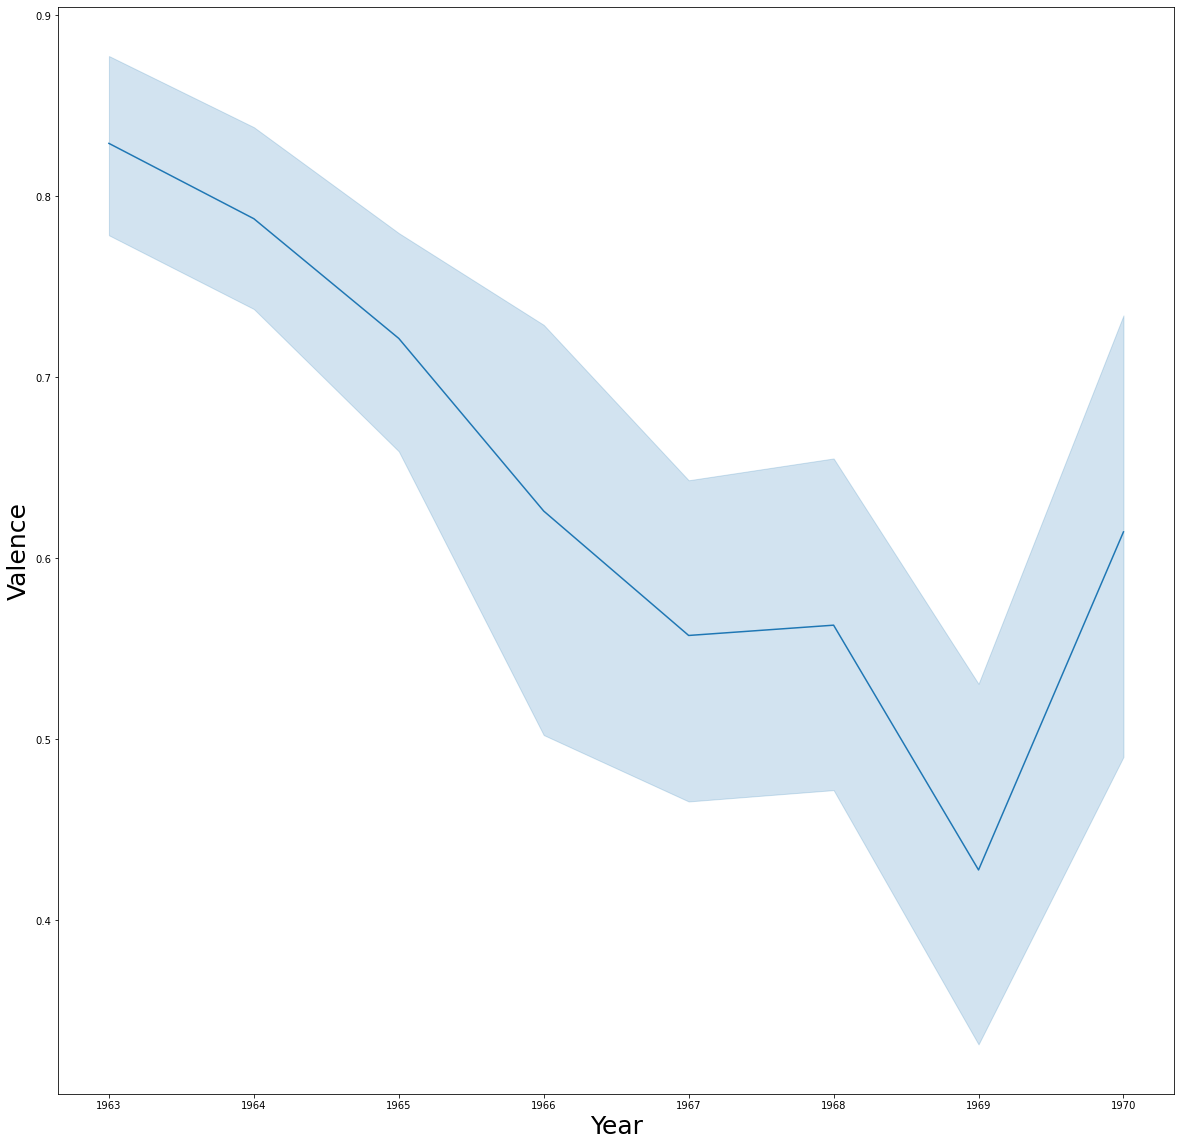

In [31]:
#A drop in valence around 69, as was the case with danceability. Therefore valence and danceability are closely related. 

sns.lineplot(data=beatles_columns2, y="valence", x="year")
plt.gcf().set_size_inches(20, 20)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Valence", fontsize=25);

In [32]:
#Looking at the most popular songs
beatles_song = beatles_columns2.set_index("song")
beatles_popular = beatles_song.loc[["let it be ", "Help!", "Heres comes the sun", "come together", "yesterday", "Twist and Shout", "blackbird", "in my life", "something"]]
beatles_popular

,year,duration_ms,album,danceability,valence,energy,liveness,acousticness
song,,,,,,,,
let it be,1970,243027,Let It Be,0.443,0.410,0.403,0.1110,0.6310
Help!,1965,139560,Help!,0.534,0.763,0.725,0.0994,0.1880
Heres comes the sun,1969,185733,Abbey Road,0.557,0.394,0.54,0.1790,0.0339
come together,1969,259947,Abbey Road,0.533,0.187,0.376,0.0926,0.0302
yesterday,1965,125667,Help!,0.332,0.315,0.179,0.0886,0.8790
Twist and Shout,1963,155227,Please Please Me,0.482,0.937,0.849,0.0414,0.6410
blackbird,1968,138387,The Beatles (white album),0.686,0.372,0.127,0.0573,0.7540
in my life,1965,146333,Rubber Soul,0.688,0.435,0.435,0.1130,0.4490
something,1969,182293,Abbey Road,0.396,0.377,0.338,0.1380,0.1980


In [33]:
#Comparing the most popular songs to the overall song averages described in previous df
beatles_popular.describe()

,year,duration_ms,danceability,valence,liveness,acousticness
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1967.0,175130.444444,0.516778,0.465556,0.102256,0.422678
std,2.5,47768.865658,0.120163,0.233647,0.040883,0.320254
min,1963.0,125667.000000,0.332000,0.187000,0.041400,0.030200
25%,1965.0,139560.000000,0.443000,0.372000,0.088600,0.188000
50%,1968.0,155227.000000,0.533000,0.394000,0.099400,0.449000
75%,1969.0,185733.000000,0.557000,0.435000,0.113000,0.641000
max,1970.0,259947.000000,0.688000,0.937000,0.179000,0.879000


In [34]:
#Adding columns for Spotify streams of the most popular songs and key. Also sorting by no. of times streamed & key. 
streams = [466, 224, 825, 515, 419, 300, 287, 230, 204]
key = ["C major", "F sharp", "A major", "D minor", "F major", "F major", "G major", "A major", "C major/A major"]
beatles_popular["streams"] = streams
beatles_popular["key"] = key
beatles_popular.sort_values(["streams"], ascending=[False])

,year,duration_ms,album,danceability,valence,energy,liveness,acousticness,streams,key
song,,,,,,,,,,
Heres comes the sun,1969,185733,Abbey Road,0.557,0.394,0.54,0.1790,0.0339,825,A major
come together,1969,259947,Abbey Road,0.533,0.187,0.376,0.0926,0.0302,515,D minor
let it be,1970,243027,Let It Be,0.443,0.410,0.403,0.1110,0.6310,466,C major
yesterday,1965,125667,Help!,0.332,0.315,0.179,0.0886,0.8790,419,F major
Twist and Shout,1963,155227,Please Please Me,0.482,0.937,0.849,0.0414,0.6410,300,F major
blackbird,1968,138387,The Beatles (white album),0.686,0.372,0.127,0.0573,0.7540,287,G major
in my life,1965,146333,Rubber Soul,0.688,0.435,0.435,0.1130,0.4490,230,A major
Help!,1965,139560,Help!,0.534,0.763,0.725,0.0994,0.1880,224,F sharp
something,1969,182293,Abbey Road,0.396,0.377,0.338,0.1380,0.1980,204,C major/A major


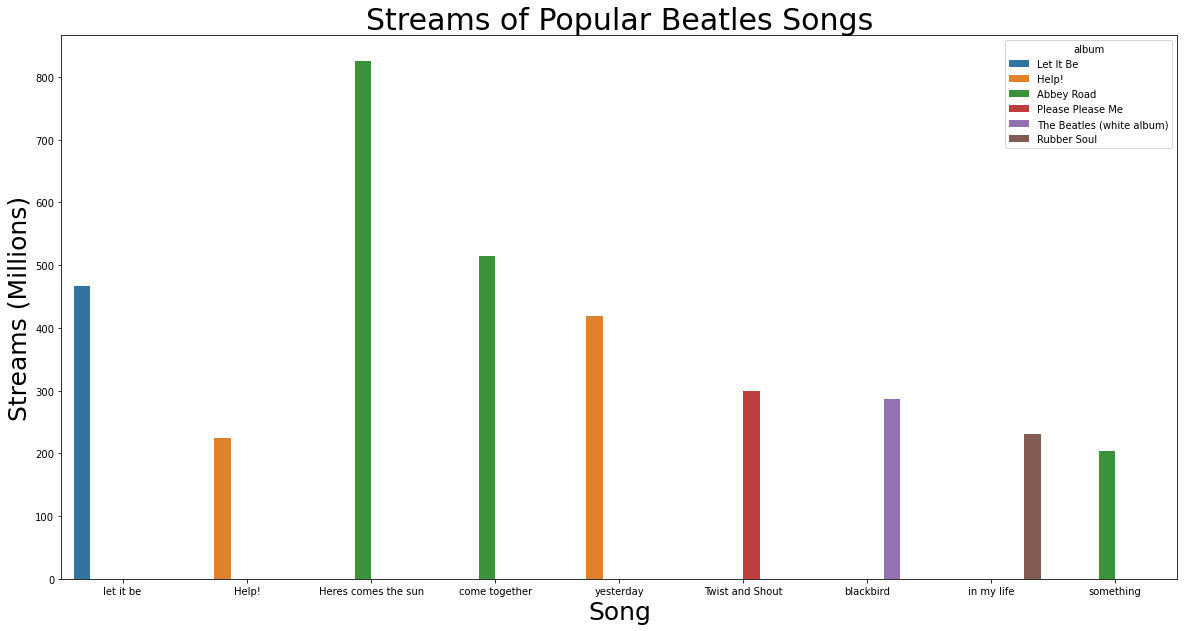

In [35]:
#Barplot showing the streams of the most popular Beatles songs with Abbey Road as most represented here
sns.barplot(y = beatles_popular["streams"], x = beatles_popular.index, hue = beatles_popular["album"])
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Streams (Millions)", fontsize=25)
plt.xlabel("Song", fontsize=25)
plt.title("Streams of Popular Beatles Songs", fontsize=30);

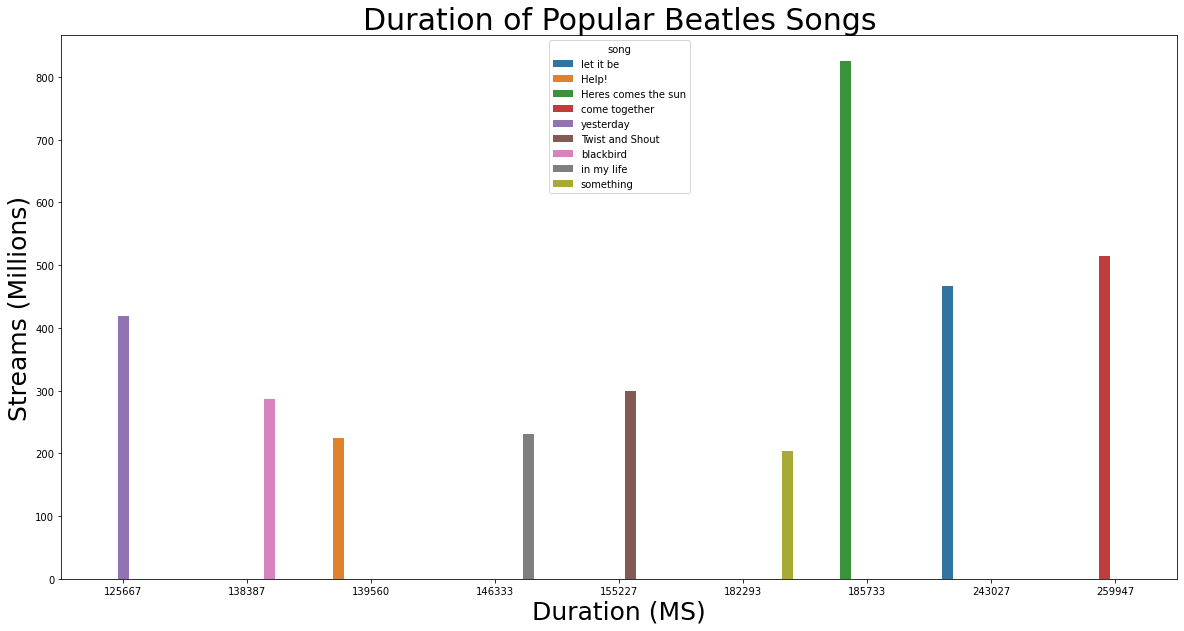

In [36]:
#Barplot showing the durations of the most popular Beatles songs -when we consider Hey Jude longest songs
sns.barplot(y = beatles_popular["streams"], x = beatles_popular["duration_ms"], hue = beatles_popular.index)
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Streams (Millions)", fontsize=25)
plt.xlabel("Duration (MS)", fontsize=25)
plt.title("Duration of Popular Beatles Songs", fontsize=30);


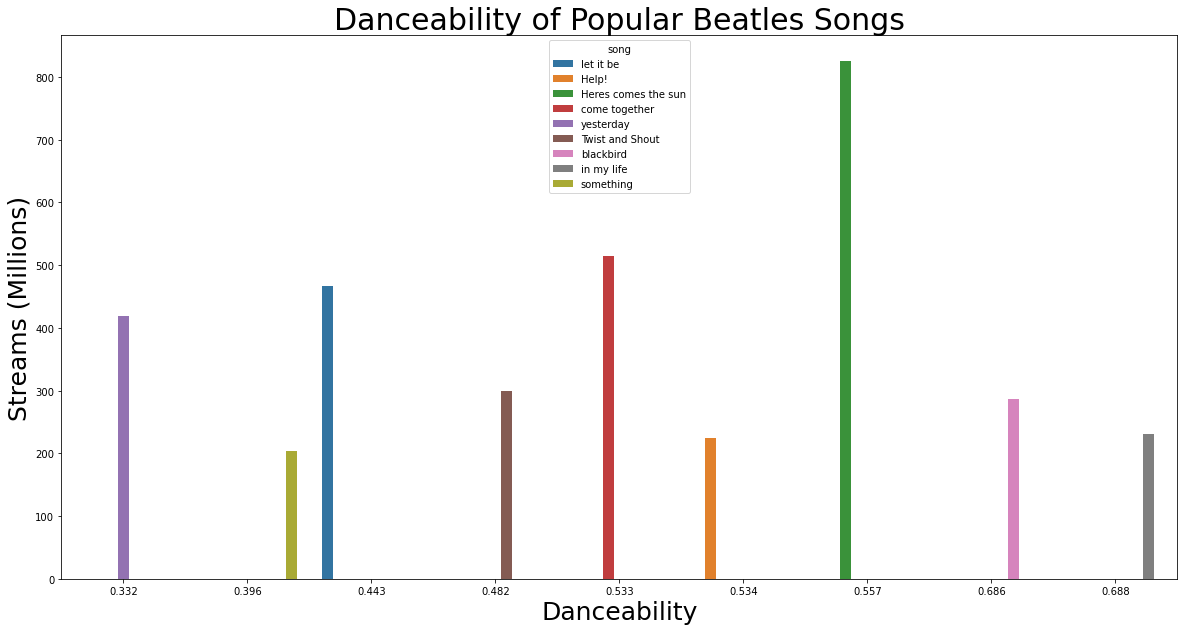

In [37]:
#Barplot showing the danceability of the most popular Beatles songs
sns.barplot(y = beatles_popular["streams"], x = beatles_popular["danceability"], hue = beatles_popular.index)
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Streams (Millions)", fontsize=25)
plt.xlabel("Danceability", fontsize=25)
plt.title("Danceability of Popular Beatles Songs", fontsize=30);

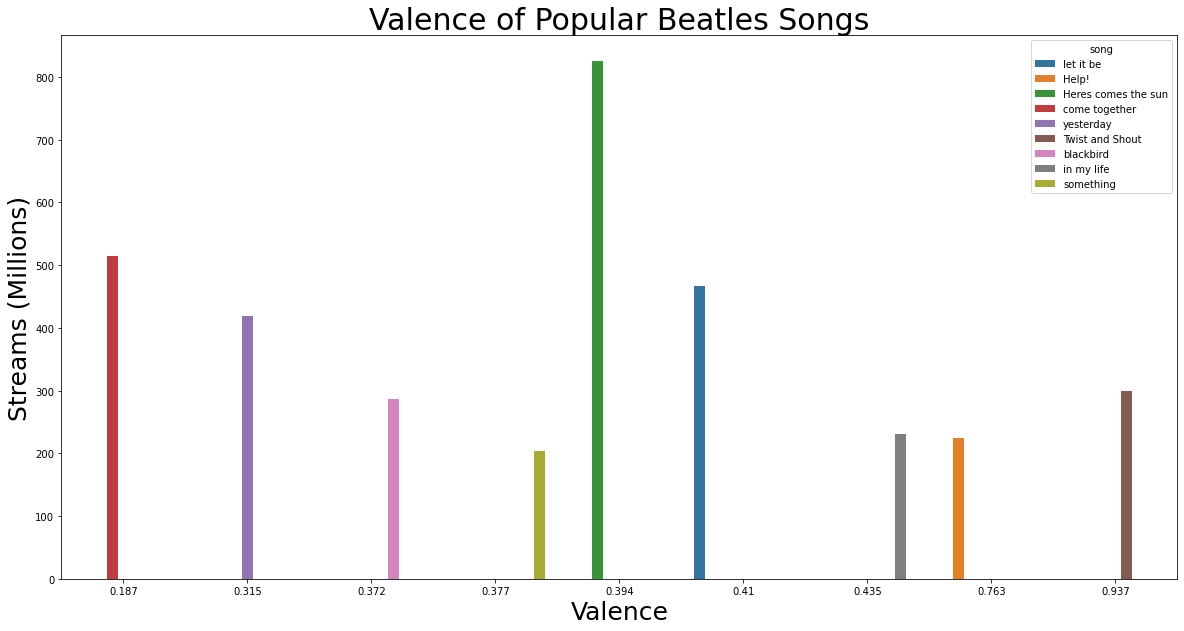

In [38]:
#Barplot showing the valence of the most popular Beatles songs
sns.barplot(y = beatles_popular["streams"], x = beatles_popular["valence"], hue = beatles_popular.index)
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Streams (Millions)", fontsize=25)
plt.xlabel("Valence", fontsize=25)
plt.title("Valence of Popular Beatles Songs", fontsize=30);

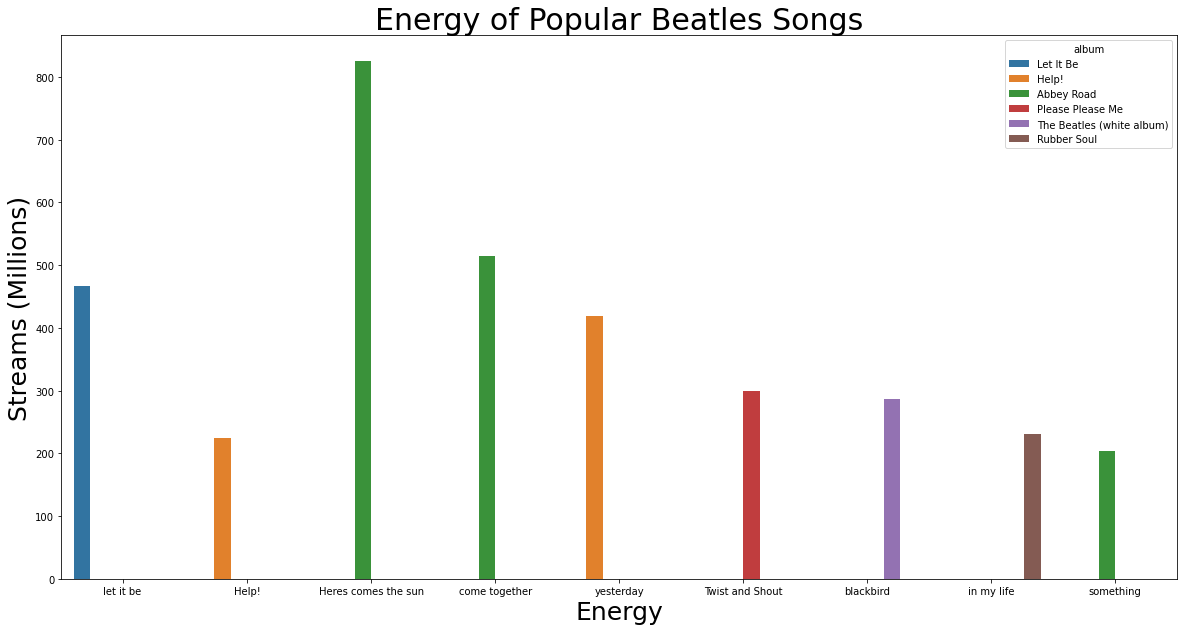

In [39]:
#Barplot showing the number of streams of the most popular Beatles songs
sns.barplot(y = beatles_popular["streams"], x = beatles_popular.index, hue = beatles_popular["album"])
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Streams (Millions)", fontsize=25)
plt.xlabel("Energy", fontsize=25)
plt.title("Energy of Popular Beatles Songs", fontsize=30);

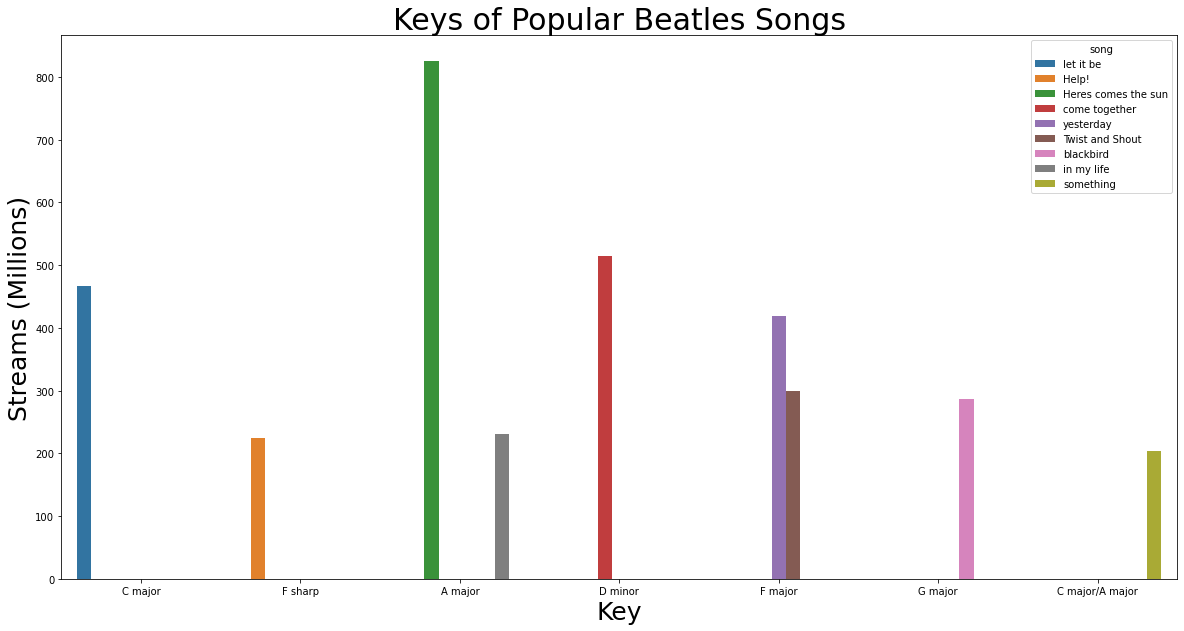

In [40]:
#Barplot showing the Keys of the most popular Beatles songs
sns.barplot(y = beatles_popular["streams"], x = beatles_popular["key"], hue = beatles_popular.index)
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Streams (Millions)", fontsize=25)
plt.xlabel("Key", fontsize=25)
plt.title("Keys of Popular Beatles Songs", fontsize=30);

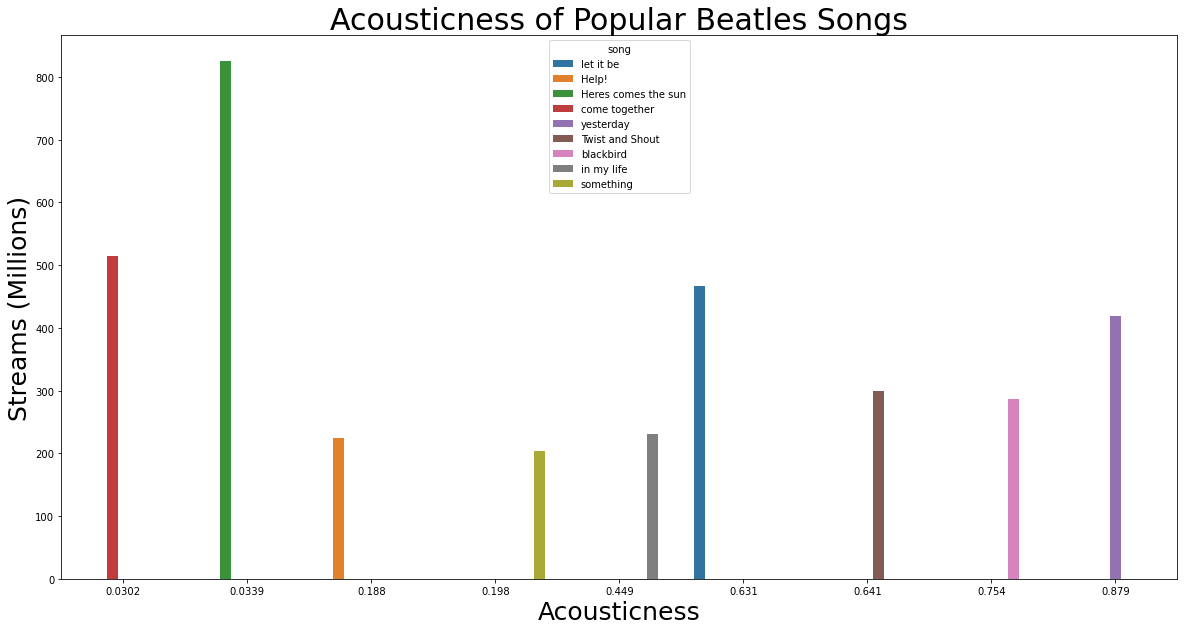

In [41]:
#Barplot showing the acousticness of the most popular Beatles songs
sns.barplot(y = beatles_popular["streams"], x = beatles_popular["acousticness"], hue = beatles_popular.index)
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Streams (Millions)", fontsize=25)
plt.xlabel("Acousticness", fontsize=25)
plt.title("Acousticness of Popular Beatles Songs", fontsize=30);

In [42]:
top2018 = pd.read_csv('top2018.csv', encoding = "ISO-8859-1")

In [43]:
top2018.head(9)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.5520,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.1310,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.1120,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.3960,0.350,91.030,217925.0,4.0
5,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10.0,-5.843,1.0,0.0454,0.3540,0.000000,0.1360,0.374,145.028,231267.0,4.0
6,58q2HKrzhC3ozto2nDdN4,I Like It,Cardi B,0.816,0.726,5.0,-3.998,0.0,0.1290,0.0990,0.000000,0.3720,0.650,136.048,253390.0,4.0
7,7ef4DlsgrMEH11cDZd32M,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,9.0,-3.240,0.0,0.1100,0.0370,0.000022,0.0814,0.592,123.994,214847.0,4.0
8,76cy1WJvNGJTj78UqeA5z,IDGAF,Dua Lipa,0.836,0.544,7.0,-5.975,1.0,0.0943,0.0403,0.000000,0.0824,0.510,97.028,217947.0,4.0


In [44]:
top_2018_9 = top2018.head(9)

In [45]:
top_2018_9.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,0.753111,0.608556,6.666667,-5.897889,0.666667,0.107167,0.175267,0.000439,0.220644,0.431667,116.143444,215615.777778,4.0
std,0.080837,0.121407,2.692582,1.843979,0.500000,0.028759,0.188039,0.001231,0.172661,0.150795,31.589538,23458.686466,0.0
min,0.587000,0.449000,1.000000,-9.211000,0.000000,0.045400,0.033200,0.000000,0.081400,0.140000,75.023000,166606.000000,4.0
25%,0.739000,0.544000,5.000000,-6.090000,0.000000,0.094300,0.040300,0.000000,0.112000,0.357000,91.030000,214847.000000,4.0
50%,0.754000,0.563000,7.000000,-5.843000,1.000000,0.110000,0.099000,0.000022,0.131000,0.439000,123.994000,217947.000000,4.0
75%,0.816000,0.626000,8.000000,-4.880000,1.000000,0.125000,0.258000,0.000066,0.372000,0.510000,140.124000,221440.000000,4.0
max,0.836000,0.862000,10.000000,-3.240000,1.000000,0.145000,0.580000,0.003720,0.552000,0.650000,159.847000,253390.000000,4.0


In [46]:
beatles_versus_2018 = pd.merge(beatles_describe, top_2018_9, on=["duration_ms"])

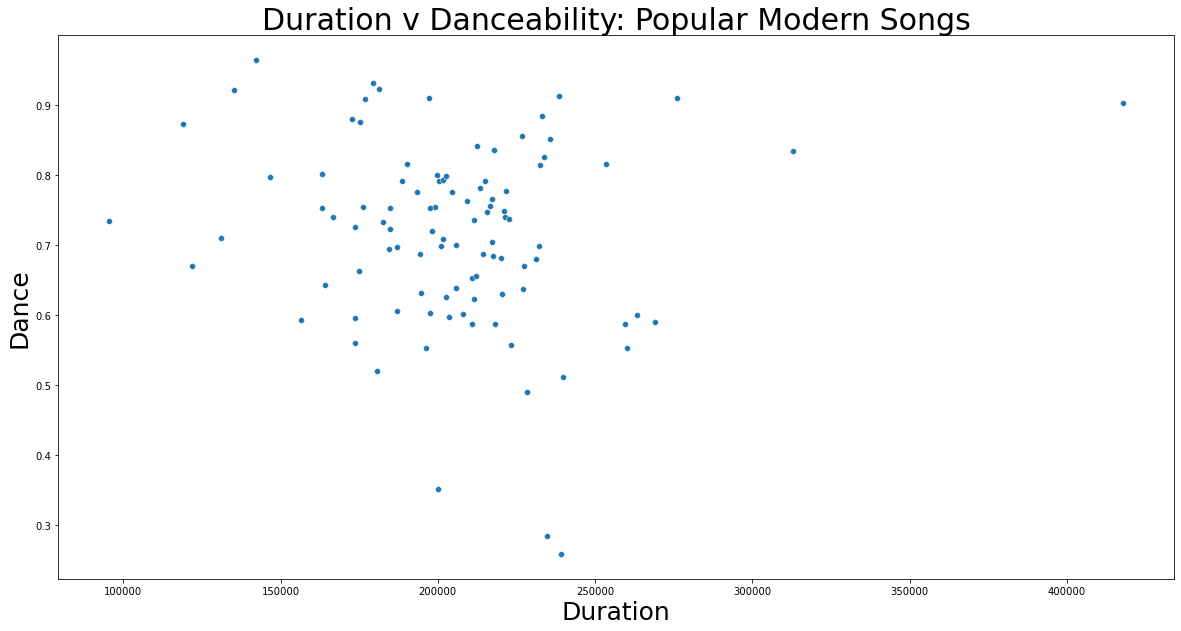

In [47]:
#Barplot showing relationship between duration and danceability of Modern Songs - showing popular songs tend to be 3-4mins
sns.scatterplot(x = top2018["duration_ms"], y = top2018["danceability"])
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Dance", fontsize=25)
plt.xlabel("Duration", fontsize=25)
plt.title("Duration v Danceability: Popular Modern Songs", fontsize=30);

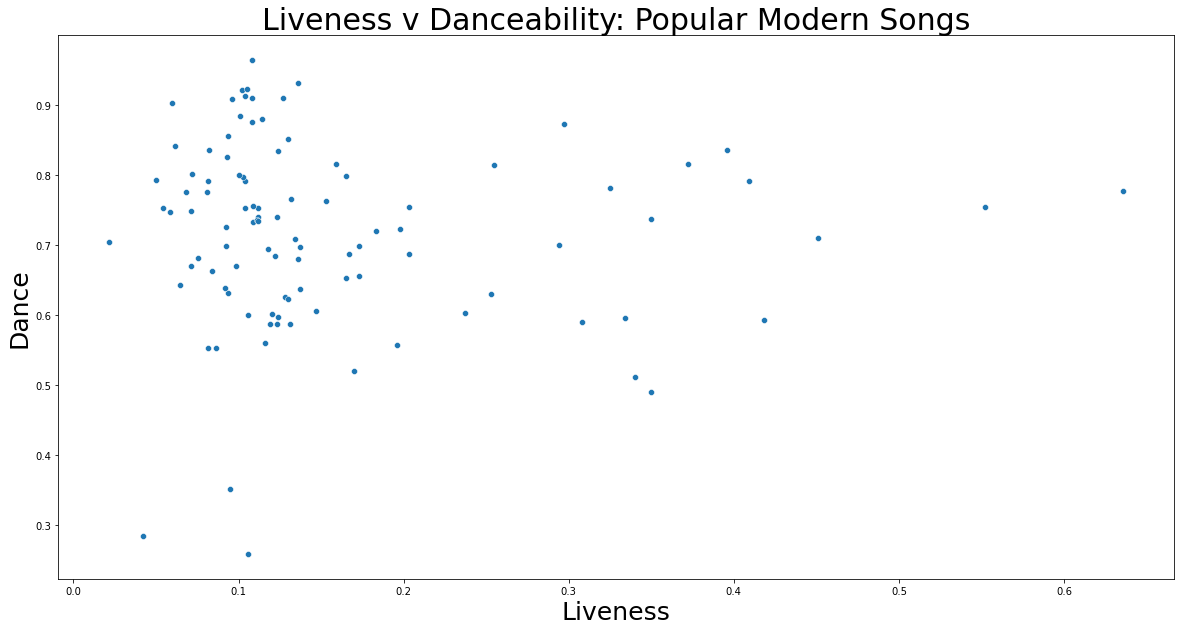

In [48]:
#Barplot showing relationship between duration and danceability of Modern Songs - showing popular songs tend to be 3-4mins
sns.scatterplot(x = top2018["liveness"], y = top2018["danceability"])
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Dance", fontsize=25)
plt.xlabel("Liveness", fontsize=25)
plt.title("Liveness v Danceability: Popular Modern Songs", fontsize=30);

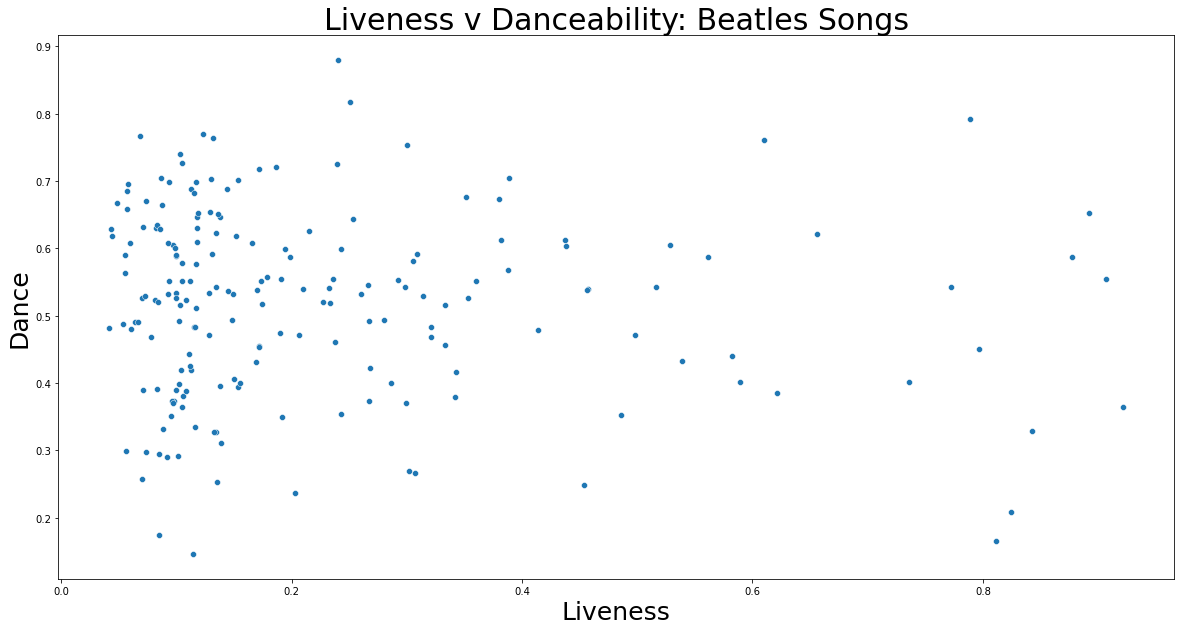

In [49]:
#Barplot showing relationship between duration and danceability of Modern Songs - showing popular songs tend to be 3-4mins
sns.scatterplot(x = beatles_columns["liveness"], y = beatles_columns["danceability"])
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Dance", fontsize=25)
plt.xlabel("Liveness", fontsize=25)
plt.title("Liveness v Danceability: Beatles Songs", fontsize=30);

In [50]:
#End